<a href="https://colab.research.google.com/github/JiHoonMin/deeplearning/blob/main/GAN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

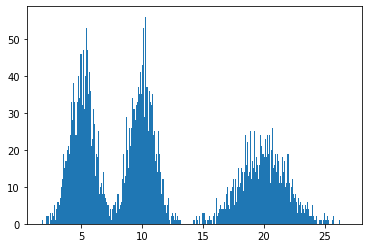

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2000 # 각 분포에서 2,000개의 데이터 샘플링
mu_1, sigma_1 = 5, 1
mu_2, sigma_2 = 10, 1
mu_3, sigma_3 = 20, 2
X1 = np.random.normal(mu_1, sigma_1, N)
X2 = np.random.normal(mu_2, sigma_2, N)
X3 = np.random.normal(mu_3, sigma_3, N)

# 학습 데이터 생성
X = np.concatenate([X1, X2, X3])
X = np.asarray(X)

# 학습 데이터 분포 시각화
plt.hist(X, bins=500)
plt.show()

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class ImageDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, index):
        x = self.dataset[index % len(self.dataset)]
        return x

    def __len__(self):
        return len(self.dataset)

In [ ]:
train_dataset = ImageDataset(dataset=X)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
import torch.nn as nn


# 생성자(Generator) 아키텍처
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # 32차원 Latent Vector로 시작하여 고차원 레이어를 거친 뒤에 출력값 생성
        self.model = nn.Sequential(
            nn.Linear(32, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.Sigmoid(),
            nn.Linear(256, 1)
        )

    def forward(self, z):
        return self.model(z)


# 판별자(Discriminator) 아키텍처
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # 1차원 데이터를 입력받아 고차원 레이어를 거친 뒤에 판별 결과 생성
        self.model = nn.Sequential(
            nn.Linear(1, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
import torch

# 생성자(generator)와 판별자(discriminator) 초기화
generator = Generator().cuda()
discriminator = Discriminator().cuda()

# 손실 함수(loss function)
adversarial_loss = nn.BCELoss().cuda()

# 학습률(learning rate) 설정
lr = 0.0005

# 생성자와 판별자를 위한 최적화 함수 정의
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Epoch 0/200] [Mean of D result: 0.325638] [D loss: 0.568585] [G loss: 1.040895] [Elapsed time: 0.64s]


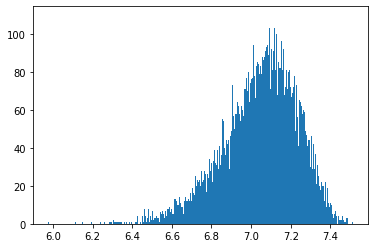

[Epoch 1/200] [Mean of D result: 0.396811] [D loss: 0.734256] [G loss: 0.447476] [Elapsed time: 1.95s]
[Epoch 2/200] [Mean of D result: 0.419476] [D loss: 0.652086] [G loss: 0.828047] [Elapsed time: 2.36s]
[Epoch 3/200] [Mean of D result: 0.414301] [D loss: 0.592313] [G loss: 1.277957] [Elapsed time: 2.77s]
[Epoch 4/200] [Mean of D result: 0.396859] [D loss: 0.485051] [G loss: 0.873585] [Elapsed time: 3.18s]
[Epoch 5/200] [Mean of D result: 0.360510] [D loss: 0.410285] [G loss: 1.151027] [Elapsed time: 3.58s]
[Epoch 6/200] [Mean of D result: 0.433531] [D loss: 0.369176] [G loss: 0.902999] [Elapsed time: 3.99s]
[Epoch 7/200] [Mean of D result: 0.354039] [D loss: 0.786006] [G loss: 0.639698] [Elapsed time: 4.40s]
[Epoch 8/200] [Mean of D result: 0.412197] [D loss: 0.684635] [G loss: 1.246080] [Elapsed time: 4.82s]
[Epoch 9/200] [Mean of D result: 0.376718] [D loss: 0.565506] [G loss: 1.625436] [Elapsed time: 5.23s]
[Epoch 10/200] [Mean of D result: 0.339490] [D loss: 0.448600] [G loss: 1

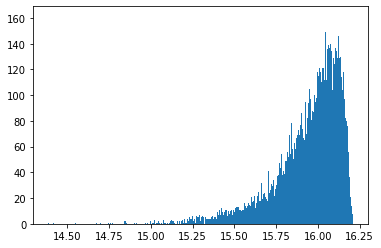

[Epoch 11/200] [Mean of D result: 0.340505] [D loss: 0.504161] [G loss: 0.592529] [Elapsed time: 6.96s]
[Epoch 12/200] [Mean of D result: 0.490380] [D loss: 0.871315] [G loss: 0.302228] [Elapsed time: 7.38s]
[Epoch 13/200] [Mean of D result: 0.432941] [D loss: 0.772302] [G loss: 0.940740] [Elapsed time: 7.80s]
[Epoch 14/200] [Mean of D result: 0.390772] [D loss: 0.622615] [G loss: 0.904939] [Elapsed time: 8.21s]
[Epoch 15/200] [Mean of D result: 0.350927] [D loss: 0.535823] [G loss: 0.758951] [Elapsed time: 8.61s]
[Epoch 16/200] [Mean of D result: 0.338141] [D loss: 0.506124] [G loss: 0.739029] [Elapsed time: 9.04s]
[Epoch 17/200] [Mean of D result: 0.420700] [D loss: 0.715282] [G loss: 0.653355] [Elapsed time: 9.45s]
[Epoch 18/200] [Mean of D result: 0.558742] [D loss: 0.640719] [G loss: 0.928914] [Elapsed time: 9.87s]
[Epoch 19/200] [Mean of D result: 0.394246] [D loss: 0.630929] [G loss: 0.946951] [Elapsed time: 10.27s]
[Epoch 20/200] [Mean of D result: 0.436566] [D loss: 0.657902] 

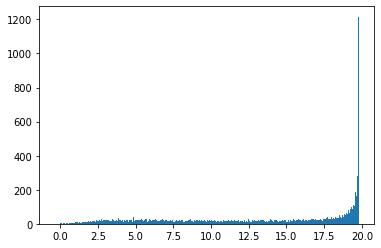

[Epoch 21/200] [Mean of D result: 0.512062] [D loss: 0.688590] [G loss: 0.647260] [Elapsed time: 11.93s]
[Epoch 22/200] [Mean of D result: 0.499907] [D loss: 0.693337] [G loss: 0.789307] [Elapsed time: 12.34s]
[Epoch 23/200] [Mean of D result: 0.497955] [D loss: 0.704982] [G loss: 0.695358] [Elapsed time: 12.75s]
[Epoch 24/200] [Mean of D result: 0.498271] [D loss: 0.706134] [G loss: 0.660521] [Elapsed time: 13.17s]
[Epoch 25/200] [Mean of D result: 0.503856] [D loss: 0.706691] [G loss: 0.583529] [Elapsed time: 13.59s]
[Epoch 26/200] [Mean of D result: 0.500737] [D loss: 0.692369] [G loss: 0.647860] [Elapsed time: 14.01s]
[Epoch 27/200] [Mean of D result: 0.494701] [D loss: 0.692151] [G loss: 0.676008] [Elapsed time: 14.43s]
[Epoch 28/200] [Mean of D result: 0.494161] [D loss: 0.685742] [G loss: 0.648538] [Elapsed time: 14.84s]
[Epoch 29/200] [Mean of D result: 0.489737] [D loss: 0.686977] [G loss: 0.662187] [Elapsed time: 15.26s]
[Epoch 30/200] [Mean of D result: 0.492689] [D loss: 0.

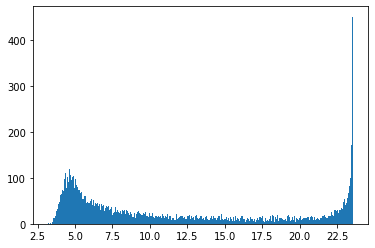

[Epoch 31/200] [Mean of D result: 0.491271] [D loss: 0.683314] [G loss: 0.665114] [Elapsed time: 17.01s]
[Epoch 32/200] [Mean of D result: 0.494053] [D loss: 0.688673] [G loss: 0.680006] [Elapsed time: 17.42s]
[Epoch 33/200] [Mean of D result: 0.500010] [D loss: 0.687447] [G loss: 0.704019] [Elapsed time: 17.83s]
[Epoch 34/200] [Mean of D result: 0.497811] [D loss: 0.698944] [G loss: 0.844012] [Elapsed time: 18.27s]
[Epoch 35/200] [Mean of D result: 0.498098] [D loss: 0.696391] [G loss: 0.611710] [Elapsed time: 18.69s]
[Epoch 36/200] [Mean of D result: 0.496925] [D loss: 0.692306] [G loss: 0.761837] [Elapsed time: 19.10s]
[Epoch 37/200] [Mean of D result: 0.497219] [D loss: 0.692227] [G loss: 0.755742] [Elapsed time: 19.51s]
[Epoch 38/200] [Mean of D result: 0.499543] [D loss: 0.692006] [G loss: 0.778759] [Elapsed time: 19.92s]
[Epoch 39/200] [Mean of D result: 0.499714] [D loss: 0.703560] [G loss: 0.573025] [Elapsed time: 20.34s]
[Epoch 40/200] [Mean of D result: 0.495371] [D loss: 0.

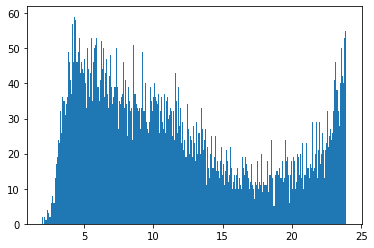

[Epoch 41/200] [Mean of D result: 0.500089] [D loss: 0.689273] [G loss: 0.808383] [Elapsed time: 22.00s]
[Epoch 42/200] [Mean of D result: 0.498718] [D loss: 0.694294] [G loss: 0.627490] [Elapsed time: 22.41s]
[Epoch 43/200] [Mean of D result: 0.497460] [D loss: 0.685965] [G loss: 0.676007] [Elapsed time: 22.82s]
[Epoch 44/200] [Mean of D result: 0.496733] [D loss: 0.693424] [G loss: 0.646017] [Elapsed time: 23.24s]
[Epoch 45/200] [Mean of D result: 0.496593] [D loss: 0.690247] [G loss: 0.748117] [Elapsed time: 23.78s]
[Epoch 46/200] [Mean of D result: 0.497879] [D loss: 0.698902] [G loss: 0.597600] [Elapsed time: 24.18s]
[Epoch 47/200] [Mean of D result: 0.496626] [D loss: 0.694503] [G loss: 0.660353] [Elapsed time: 24.60s]
[Epoch 48/200] [Mean of D result: 0.495650] [D loss: 0.687233] [G loss: 0.693225] [Elapsed time: 25.02s]
[Epoch 49/200] [Mean of D result: 0.497758] [D loss: 0.690800] [G loss: 0.729986] [Elapsed time: 25.44s]
[Epoch 50/200] [Mean of D result: 0.499646] [D loss: 0.

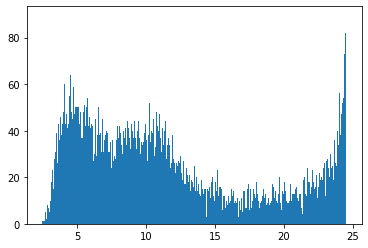

[Epoch 51/200] [Mean of D result: 0.498618] [D loss: 0.687845] [G loss: 0.664557] [Elapsed time: 27.11s]
[Epoch 52/200] [Mean of D result: 0.497497] [D loss: 0.692050] [G loss: 0.739750] [Elapsed time: 27.54s]
[Epoch 53/200] [Mean of D result: 0.498630] [D loss: 0.689956] [G loss: 0.698272] [Elapsed time: 27.96s]
[Epoch 54/200] [Mean of D result: 0.495158] [D loss: 0.691673] [G loss: 0.642318] [Elapsed time: 28.40s]
[Epoch 55/200] [Mean of D result: 0.499540] [D loss: 0.689821] [G loss: 0.810517] [Elapsed time: 28.83s]
[Epoch 56/200] [Mean of D result: 0.495975] [D loss: 0.685063] [G loss: 0.807973] [Elapsed time: 29.25s]
[Epoch 57/200] [Mean of D result: 0.499229] [D loss: 0.692754] [G loss: 0.711586] [Elapsed time: 29.67s]
[Epoch 58/200] [Mean of D result: 0.497775] [D loss: 0.697810] [G loss: 0.778159] [Elapsed time: 30.09s]
[Epoch 59/200] [Mean of D result: 0.497241] [D loss: 0.689633] [G loss: 0.680482] [Elapsed time: 30.51s]
[Epoch 60/200] [Mean of D result: 0.499861] [D loss: 0.

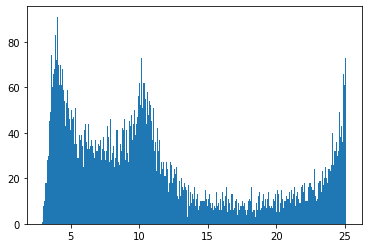

[Epoch 61/200] [Mean of D result: 0.500355] [D loss: 0.686533] [G loss: 0.678831] [Elapsed time: 32.25s]
[Epoch 62/200] [Mean of D result: 0.496975] [D loss: 0.695979] [G loss: 0.728511] [Elapsed time: 32.67s]
[Epoch 63/200] [Mean of D result: 0.498543] [D loss: 0.689743] [G loss: 0.699481] [Elapsed time: 33.09s]
[Epoch 64/200] [Mean of D result: 0.497123] [D loss: 0.712527] [G loss: 0.843275] [Elapsed time: 33.52s]
[Epoch 65/200] [Mean of D result: 0.500462] [D loss: 0.696240] [G loss: 0.642282] [Elapsed time: 33.95s]
[Epoch 66/200] [Mean of D result: 0.498101] [D loss: 0.689593] [G loss: 0.714745] [Elapsed time: 34.38s]
[Epoch 67/200] [Mean of D result: 0.496775] [D loss: 0.692656] [G loss: 0.696581] [Elapsed time: 34.82s]
[Epoch 68/200] [Mean of D result: 0.498041] [D loss: 0.693615] [G loss: 0.638161] [Elapsed time: 35.25s]
[Epoch 69/200] [Mean of D result: 0.498886] [D loss: 0.693612] [G loss: 0.658826] [Elapsed time: 35.68s]
[Epoch 70/200] [Mean of D result: 0.498842] [D loss: 0.

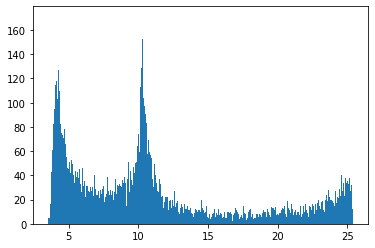

[Epoch 71/200] [Mean of D result: 0.499839] [D loss: 0.695545] [G loss: 0.637691] [Elapsed time: 37.37s]
[Epoch 72/200] [Mean of D result: 0.497108] [D loss: 0.702029] [G loss: 0.741637] [Elapsed time: 37.79s]
[Epoch 73/200] [Mean of D result: 0.499667] [D loss: 0.691022] [G loss: 0.742811] [Elapsed time: 38.22s]
[Epoch 74/200] [Mean of D result: 0.498764] [D loss: 0.704928] [G loss: 0.822199] [Elapsed time: 38.65s]
[Epoch 75/200] [Mean of D result: 0.499070] [D loss: 0.694637] [G loss: 0.774036] [Elapsed time: 39.07s]
[Epoch 76/200] [Mean of D result: 0.497105] [D loss: 0.689981] [G loss: 0.686463] [Elapsed time: 39.49s]
[Epoch 77/200] [Mean of D result: 0.501054] [D loss: 0.691930] [G loss: 0.702133] [Elapsed time: 39.90s]
[Epoch 78/200] [Mean of D result: 0.499789] [D loss: 0.691251] [G loss: 0.698077] [Elapsed time: 40.33s]
[Epoch 79/200] [Mean of D result: 0.498372] [D loss: 0.692328] [G loss: 0.693581] [Elapsed time: 40.75s]
[Epoch 80/200] [Mean of D result: 0.497239] [D loss: 0.

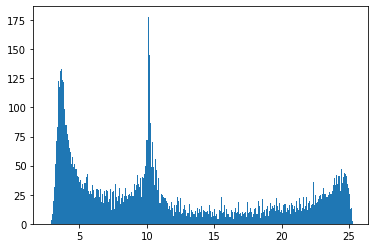

[Epoch 81/200] [Mean of D result: 0.496091] [D loss: 0.692311] [G loss: 0.695267] [Elapsed time: 42.52s]
[Epoch 82/200] [Mean of D result: 0.500754] [D loss: 0.690932] [G loss: 0.736983] [Elapsed time: 42.94s]
[Epoch 83/200] [Mean of D result: 0.497905] [D loss: 0.693260] [G loss: 0.651782] [Elapsed time: 43.36s]
[Epoch 84/200] [Mean of D result: 0.500601] [D loss: 0.698751] [G loss: 0.599164] [Elapsed time: 43.79s]
[Epoch 85/200] [Mean of D result: 0.498037] [D loss: 0.695522] [G loss: 0.616442] [Elapsed time: 44.20s]
[Epoch 86/200] [Mean of D result: 0.498110] [D loss: 0.695572] [G loss: 0.737825] [Elapsed time: 44.64s]
[Epoch 87/200] [Mean of D result: 0.499833] [D loss: 0.691441] [G loss: 0.688674] [Elapsed time: 45.05s]
[Epoch 88/200] [Mean of D result: 0.499775] [D loss: 0.691681] [G loss: 0.718194] [Elapsed time: 45.47s]
[Epoch 89/200] [Mean of D result: 0.501108] [D loss: 0.691509] [G loss: 0.703507] [Elapsed time: 45.88s]
[Epoch 90/200] [Mean of D result: 0.498540] [D loss: 0.

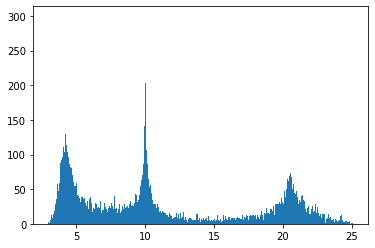

[Epoch 91/200] [Mean of D result: 0.498135] [D loss: 0.693430] [G loss: 0.665569] [Elapsed time: 47.62s]
[Epoch 92/200] [Mean of D result: 0.499978] [D loss: 0.696807] [G loss: 0.737747] [Elapsed time: 48.04s]
[Epoch 93/200] [Mean of D result: 0.501338] [D loss: 0.694523] [G loss: 0.754323] [Elapsed time: 48.46s]
[Epoch 94/200] [Mean of D result: 0.499736] [D loss: 0.691974] [G loss: 0.712060] [Elapsed time: 48.89s]
[Epoch 95/200] [Mean of D result: 0.498605] [D loss: 0.693358] [G loss: 0.730289] [Elapsed time: 49.30s]
[Epoch 96/200] [Mean of D result: 0.498612] [D loss: 0.692600] [G loss: 0.658844] [Elapsed time: 49.73s]
[Epoch 97/200] [Mean of D result: 0.500648] [D loss: 0.692701] [G loss: 0.664526] [Elapsed time: 50.15s]
[Epoch 98/200] [Mean of D result: 0.500068] [D loss: 0.691194] [G loss: 0.679278] [Elapsed time: 50.57s]
[Epoch 99/200] [Mean of D result: 0.499177] [D loss: 0.693442] [G loss: 0.738861] [Elapsed time: 50.99s]
[Epoch 100/200] [Mean of D result: 0.500381] [D loss: 0

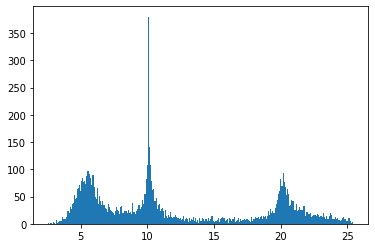

[Epoch 101/200] [Mean of D result: 0.498474] [D loss: 0.691919] [G loss: 0.734744] [Elapsed time: 52.66s]
[Epoch 102/200] [Mean of D result: 0.500286] [D loss: 0.692907] [G loss: 0.649478] [Elapsed time: 53.08s]
[Epoch 103/200] [Mean of D result: 0.499892] [D loss: 0.694351] [G loss: 0.652139] [Elapsed time: 53.50s]
[Epoch 104/200] [Mean of D result: 0.499846] [D loss: 0.693022] [G loss: 0.739281] [Elapsed time: 53.91s]
[Epoch 105/200] [Mean of D result: 0.499754] [D loss: 0.693535] [G loss: 0.702437] [Elapsed time: 54.33s]
[Epoch 106/200] [Mean of D result: 0.499924] [D loss: 0.693023] [G loss: 0.697627] [Elapsed time: 54.76s]
[Epoch 107/200] [Mean of D result: 0.498886] [D loss: 0.694717] [G loss: 0.754481] [Elapsed time: 55.17s]
[Epoch 108/200] [Mean of D result: 0.500150] [D loss: 0.693007] [G loss: 0.667164] [Elapsed time: 55.59s]
[Epoch 109/200] [Mean of D result: 0.501259] [D loss: 0.693021] [G loss: 0.729090] [Elapsed time: 56.01s]
[Epoch 110/200] [Mean of D result: 0.500400] [

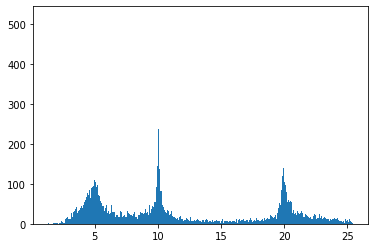

[Epoch 111/200] [Mean of D result: 0.498635] [D loss: 0.691904] [G loss: 0.703101] [Elapsed time: 57.75s]
[Epoch 112/200] [Mean of D result: 0.501463] [D loss: 0.692857] [G loss: 0.721941] [Elapsed time: 58.17s]
[Epoch 113/200] [Mean of D result: 0.499448] [D loss: 0.695823] [G loss: 0.653513] [Elapsed time: 58.60s]
[Epoch 114/200] [Mean of D result: 0.500059] [D loss: 0.690731] [G loss: 0.685926] [Elapsed time: 59.01s]
[Epoch 115/200] [Mean of D result: 0.500305] [D loss: 0.693344] [G loss: 0.642082] [Elapsed time: 59.45s]
[Epoch 116/200] [Mean of D result: 0.498487] [D loss: 0.694735] [G loss: 0.748378] [Elapsed time: 59.88s]
[Epoch 117/200] [Mean of D result: 0.501343] [D loss: 0.695043] [G loss: 0.663454] [Elapsed time: 60.30s]
[Epoch 118/200] [Mean of D result: 0.499127] [D loss: 0.692719] [G loss: 0.701270] [Elapsed time: 60.72s]
[Epoch 119/200] [Mean of D result: 0.499883] [D loss: 0.691957] [G loss: 0.683119] [Elapsed time: 61.13s]
[Epoch 120/200] [Mean of D result: 0.500000] [

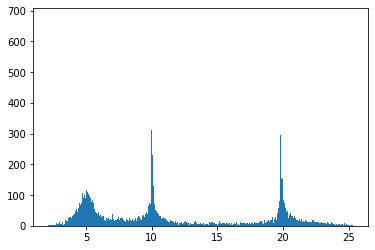

[Epoch 121/200] [Mean of D result: 0.500125] [D loss: 0.692918] [G loss: 0.697257] [Elapsed time: 62.89s]
[Epoch 122/200] [Mean of D result: 0.499792] [D loss: 0.693171] [G loss: 0.678482] [Elapsed time: 63.30s]
[Epoch 123/200] [Mean of D result: 0.500787] [D loss: 0.693860] [G loss: 0.687573] [Elapsed time: 63.73s]
[Epoch 124/200] [Mean of D result: 0.500140] [D loss: 0.692795] [G loss: 0.687051] [Elapsed time: 64.14s]
[Epoch 125/200] [Mean of D result: 0.498991] [D loss: 0.692714] [G loss: 0.700859] [Elapsed time: 64.55s]
[Epoch 126/200] [Mean of D result: 0.500456] [D loss: 0.693011] [G loss: 0.690930] [Elapsed time: 64.98s]
[Epoch 127/200] [Mean of D result: 0.502388] [D loss: 0.693228] [G loss: 0.708385] [Elapsed time: 65.39s]
[Epoch 128/200] [Mean of D result: 0.500420] [D loss: 0.692915] [G loss: 0.687718] [Elapsed time: 65.81s]
[Epoch 129/200] [Mean of D result: 0.498519] [D loss: 0.693691] [G loss: 0.690003] [Elapsed time: 66.22s]
[Epoch 130/200] [Mean of D result: 0.501099] [

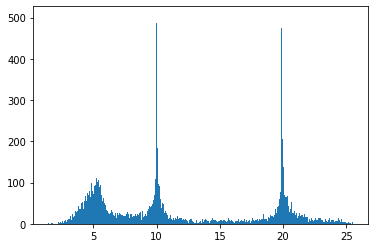

[Epoch 131/200] [Mean of D result: 0.500771] [D loss: 0.693178] [G loss: 0.701286] [Elapsed time: 67.88s]
[Epoch 132/200] [Mean of D result: 0.502335] [D loss: 0.693353] [G loss: 0.680607] [Elapsed time: 68.30s]
[Epoch 133/200] [Mean of D result: 0.496086] [D loss: 0.693240] [G loss: 0.691727] [Elapsed time: 68.72s]
[Epoch 134/200] [Mean of D result: 0.503654] [D loss: 0.692169] [G loss: 0.691679] [Elapsed time: 69.15s]
[Epoch 135/200] [Mean of D result: 0.499331] [D loss: 0.693589] [G loss: 0.686584] [Elapsed time: 69.58s]
[Epoch 136/200] [Mean of D result: 0.499327] [D loss: 0.692913] [G loss: 0.695495] [Elapsed time: 70.00s]
[Epoch 137/200] [Mean of D result: 0.500166] [D loss: 0.693197] [G loss: 0.685205] [Elapsed time: 70.41s]
[Epoch 138/200] [Mean of D result: 0.501392] [D loss: 0.693471] [G loss: 0.694381] [Elapsed time: 70.83s]
[Epoch 139/200] [Mean of D result: 0.499429] [D loss: 0.693179] [G loss: 0.688074] [Elapsed time: 71.25s]
[Epoch 140/200] [Mean of D result: 0.499865] [

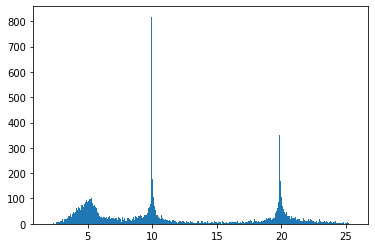

[Epoch 141/200] [Mean of D result: 0.500716] [D loss: 0.692974] [G loss: 0.696370] [Elapsed time: 73.03s]
[Epoch 142/200] [Mean of D result: 0.500588] [D loss: 0.693589] [G loss: 0.679849] [Elapsed time: 73.44s]
[Epoch 143/200] [Mean of D result: 0.499485] [D loss: 0.693090] [G loss: 0.689273] [Elapsed time: 73.86s]
[Epoch 144/200] [Mean of D result: 0.499711] [D loss: 0.693129] [G loss: 0.691767] [Elapsed time: 74.27s]
[Epoch 145/200] [Mean of D result: 0.500777] [D loss: 0.693443] [G loss: 0.689319] [Elapsed time: 74.70s]
[Epoch 146/200] [Mean of D result: 0.500211] [D loss: 0.693083] [G loss: 0.692364] [Elapsed time: 75.13s]
[Epoch 147/200] [Mean of D result: 0.498216] [D loss: 0.693119] [G loss: 0.683535] [Elapsed time: 75.55s]
[Epoch 148/200] [Mean of D result: 0.501411] [D loss: 0.693531] [G loss: 0.712177] [Elapsed time: 75.97s]
[Epoch 149/200] [Mean of D result: 0.499190] [D loss: 0.693272] [G loss: 0.684265] [Elapsed time: 76.39s]
[Epoch 150/200] [Mean of D result: 0.499763] [

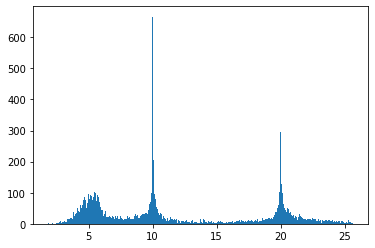

[Epoch 151/200] [Mean of D result: 0.501506] [D loss: 0.693265] [G loss: 0.686950] [Elapsed time: 78.05s]
[Epoch 152/200] [Mean of D result: 0.500890] [D loss: 0.693174] [G loss: 0.697668] [Elapsed time: 78.47s]
[Epoch 153/200] [Mean of D result: 0.498500] [D loss: 0.692854] [G loss: 0.701791] [Elapsed time: 78.99s]
[Epoch 154/200] [Mean of D result: 0.500057] [D loss: 0.692698] [G loss: 0.687465] [Elapsed time: 79.41s]
[Epoch 155/200] [Mean of D result: 0.499697] [D loss: 0.693173] [G loss: 0.690657] [Elapsed time: 79.85s]
[Epoch 156/200] [Mean of D result: 0.500588] [D loss: 0.693104] [G loss: 0.687235] [Elapsed time: 80.26s]
[Epoch 157/200] [Mean of D result: 0.500514] [D loss: 0.693325] [G loss: 0.673306] [Elapsed time: 80.67s]
[Epoch 158/200] [Mean of D result: 0.500192] [D loss: 0.693096] [G loss: 0.688701] [Elapsed time: 81.10s]
[Epoch 159/200] [Mean of D result: 0.499891] [D loss: 0.693315] [G loss: 0.713921] [Elapsed time: 81.51s]
[Epoch 160/200] [Mean of D result: 0.500383] [

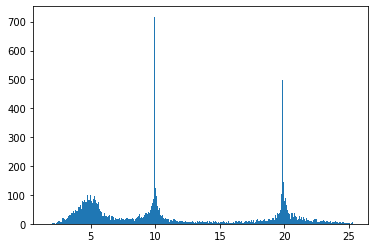

[Epoch 161/200] [Mean of D result: 0.500457] [D loss: 0.692925] [G loss: 0.702816] [Elapsed time: 83.20s]
[Epoch 162/200] [Mean of D result: 0.500697] [D loss: 0.693124] [G loss: 0.688111] [Elapsed time: 83.62s]
[Epoch 163/200] [Mean of D result: 0.499699] [D loss: 0.693269] [G loss: 0.692030] [Elapsed time: 84.05s]
[Epoch 164/200] [Mean of D result: 0.500751] [D loss: 0.693164] [G loss: 0.695139] [Elapsed time: 84.47s]
[Epoch 165/200] [Mean of D result: 0.499822] [D loss: 0.693135] [G loss: 0.695780] [Elapsed time: 84.90s]
[Epoch 166/200] [Mean of D result: 0.500342] [D loss: 0.693065] [G loss: 0.696686] [Elapsed time: 85.32s]
[Epoch 167/200] [Mean of D result: 0.500449] [D loss: 0.692944] [G loss: 0.687764] [Elapsed time: 85.75s]
[Epoch 168/200] [Mean of D result: 0.499286] [D loss: 0.693108] [G loss: 0.694267] [Elapsed time: 86.18s]
[Epoch 169/200] [Mean of D result: 0.500441] [D loss: 0.693117] [G loss: 0.691348] [Elapsed time: 86.61s]
[Epoch 170/200] [Mean of D result: 0.499400] [

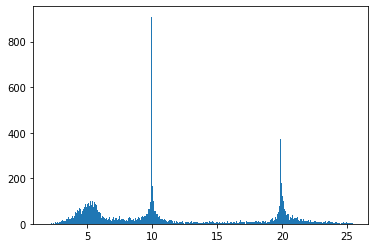

[Epoch 171/200] [Mean of D result: 0.500530] [D loss: 0.693147] [G loss: 0.693504] [Elapsed time: 88.37s]
[Epoch 172/200] [Mean of D result: 0.500297] [D loss: 0.693053] [G loss: 0.691759] [Elapsed time: 88.79s]
[Epoch 173/200] [Mean of D result: 0.500217] [D loss: 0.693335] [G loss: 0.686101] [Elapsed time: 89.21s]
[Epoch 174/200] [Mean of D result: 0.500318] [D loss: 0.693236] [G loss: 0.695936] [Elapsed time: 89.62s]
[Epoch 175/200] [Mean of D result: 0.499766] [D loss: 0.693133] [G loss: 0.695231] [Elapsed time: 90.05s]
[Epoch 176/200] [Mean of D result: 0.500669] [D loss: 0.693423] [G loss: 0.689590] [Elapsed time: 90.48s]
[Epoch 177/200] [Mean of D result: 0.499431] [D loss: 0.693095] [G loss: 0.687462] [Elapsed time: 90.89s]
[Epoch 178/200] [Mean of D result: 0.500232] [D loss: 0.693157] [G loss: 0.692331] [Elapsed time: 91.31s]
[Epoch 179/200] [Mean of D result: 0.500254] [D loss: 0.693152] [G loss: 0.691482] [Elapsed time: 91.73s]
[Epoch 180/200] [Mean of D result: 0.500028] [

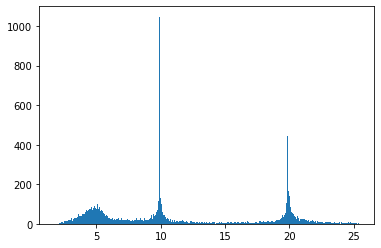

[Epoch 181/200] [Mean of D result: 0.499600] [D loss: 0.693219] [G loss: 0.692202] [Elapsed time: 93.38s]
[Epoch 182/200] [Mean of D result: 0.500505] [D loss: 0.693161] [G loss: 0.692671] [Elapsed time: 93.80s]
[Epoch 183/200] [Mean of D result: 0.499576] [D loss: 0.692728] [G loss: 0.698766] [Elapsed time: 94.23s]
[Epoch 184/200] [Mean of D result: 0.501575] [D loss: 0.693143] [G loss: 0.695714] [Elapsed time: 94.64s]
[Epoch 185/200] [Mean of D result: 0.499549] [D loss: 0.693090] [G loss: 0.711141] [Elapsed time: 95.06s]
[Epoch 186/200] [Mean of D result: 0.499557] [D loss: 0.693027] [G loss: 0.684175] [Elapsed time: 95.47s]
[Epoch 187/200] [Mean of D result: 0.499848] [D loss: 0.693241] [G loss: 0.691511] [Elapsed time: 95.89s]
[Epoch 188/200] [Mean of D result: 0.500359] [D loss: 0.693242] [G loss: 0.691229] [Elapsed time: 96.32s]
[Epoch 189/200] [Mean of D result: 0.500393] [D loss: 0.693115] [G loss: 0.694753] [Elapsed time: 96.74s]
[Epoch 190/200] [Mean of D result: 0.499769] [

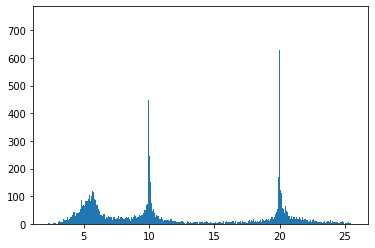

[Epoch 191/200] [Mean of D result: 0.500232] [D loss: 0.693128] [G loss: 0.693167] [Elapsed time: 98.50s]
[Epoch 192/200] [Mean of D result: 0.500147] [D loss: 0.693176] [G loss: 0.693898] [Elapsed time: 98.92s]
[Epoch 193/200] [Mean of D result: 0.499188] [D loss: 0.693040] [G loss: 0.683187] [Elapsed time: 99.34s]
[Epoch 194/200] [Mean of D result: 0.500957] [D loss: 0.693127] [G loss: 0.694970] [Elapsed time: 99.76s]
[Epoch 195/200] [Mean of D result: 0.499624] [D loss: 0.693148] [G loss: 0.693861] [Elapsed time: 100.18s]
[Epoch 196/200] [Mean of D result: 0.499674] [D loss: 0.693117] [G loss: 0.695421] [Elapsed time: 100.61s]
[Epoch 197/200] [Mean of D result: 0.499850] [D loss: 0.693079] [G loss: 0.692501] [Elapsed time: 101.04s]
[Epoch 198/200] [Mean of D result: 0.499998] [D loss: 0.693119] [G loss: 0.689945] [Elapsed time: 101.47s]
[Epoch 199/200] [Mean of D result: 0.500001] [D loss: 0.693131] [G loss: 0.693217] [Elapsed time: 101.90s]


In [ ]:
import time

n_epochs = 200 # 학습의 횟수(epoch) 설정
sample_interval = 10 # 몇 번의 epoch마다 결과를 출력할 것인지 설정 
start_time = time.time()

for epoch in range(n_epochs):
    d_outputs = [] # Discriminator의 판별 결과가 담길 리스트

    for i, batch in enumerate(train_dataloader):
        inputs = batch
        inputs = inputs.unsqueeze(1).float().cuda() # 차원: [배치 크기, 1]

        # 진짜(real) 데이터와 가짜(fake) 데이터에 대한 정답 레이블 생성
        real = torch.cuda.FloatTensor(inputs.size(0), 1).fill_(1.0).cuda() # 진짜(real): 1
        fake = torch.cuda.FloatTensor(inputs.size(0), 1).fill_(0.0).cuda() # 가짜(fake): 0

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 랜덤 노이즈(noise) 샘플링
        z = torch.normal(mean=0, std=1, size=(inputs.size(0), 32)).cuda()

        # 이미지 생성
        generated = generator(z)

        # 생성자(generator)의 손실(loss) 값 계산
        g_loss = adversarial_loss(discriminator(generated), real)

        # 생성자(generator) 업데이트
        g_loss.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        real_loss = adversarial_loss(discriminator(inputs), real)
        d_output = discriminator(generated.detach())
        fake_loss = adversarial_loss(d_output, fake)
        d_loss = (real_loss + fake_loss) / 2

        d_outputs.append(sum(d_output.detach().cpu()).item()) # 판별 결과는 별도로 저장

        # 판별자(discriminator) 업데이트
        d_loss.backward()
        optimizer_D.step()

    # 하나의 epoch이 끝날 때마다 로그(log) 출력
    print(f"[Epoch {epoch}/{n_epochs}] [Mean of D result: {sum(d_outputs) / len(X):.6f}] [D loss: {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]")

    if epoch % sample_interval == 0:
        sampled = []
        for i in range(100):
            # 랜덤 노이즈(noise) 샘플링
            z = torch.normal(mean=0, std=1, size=(128, 32)).cuda()
            generated = generator(z)
            # 하나의 배치에 포함된 모든 결과 데이터를 리스트에 삽입
            for k in generated.detach().cpu():
                sampled.append(k)

        # 결과 데이터 출력
        plt.hist(sampled, bins=500)
        plt.show()

#Gan for Mnist

In [ ]:
import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

In [ ]:
latent_dim = 100


# 생성자(Generator) 클래스 정의
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # 하나의 블록(block) 정의
        def block(input_dim, output_dim, normalize=True):
            layers = [nn.Linear(input_dim, output_dim)]
            if normalize:
                # 배치 정규화(batch normalization) 수행(차원 동일)
                layers.append(nn.BatchNorm1d(output_dim, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        # 생성자 모델은 연속적인 여러 개의 블록을 가짐
        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, 1 * 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 28, 28)
        return img

In [ ]:
# 판별자(Discriminator) 클래스 정의
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(1 * 28 * 28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    # 이미지에 대한 판별 결과를 반환
    def forward(self, img):
        flattened = img.view(img.size(0), -1)
        output = self.model(flattened)

        return output

In [ ]:
transforms_train = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.MNIST(root="./dataset", train=True, download=True, transform=transforms_train)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# 생성자(generator)와 판별자(discriminator) 초기화
generator = Generator()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

# 손실 함수(loss function)
adversarial_loss = nn.BCELoss()
adversarial_loss.cuda()

# 학습률(learning rate) 설정
lr = 0.0002

# 생성자와 판별자를 위한 최적화 함수
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [ ]:
import time

n_epochs = 200 # 학습의 횟수(epoch) 설정
sample_interval = 2000 # 몇 번의 배치(batch)마다 결과를 출력할 것인지 설정
start_time = time.time()

for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(dataloader):

        # 진짜(real) 이미지와 가짜(fake) 이미지에 대한 정답 레이블 생성
        real = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(1.0) # 진짜(real): 1
        fake = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(0.0) # 가짜(fake): 0

        real_imgs = imgs.cuda()

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 랜덤 노이즈(noise) 샘플링
        z = torch.normal(mean=0, std=1, size=(imgs.shape[0], latent_dim)).cuda()

        # 이미지 생성
        generated_imgs = generator(z)

        # 생성자(generator)의 손실(loss) 값 계산
        g_loss = adversarial_loss(discriminator(generated_imgs), real)

        # 생성자(generator) 업데이트
        g_loss.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        real_loss = adversarial_loss(discriminator(real_imgs), real)
        fake_loss = adversarial_loss(discriminator(generated_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        # 판별자(discriminator) 업데이트
        d_loss.backward()
        optimizer_D.step()

        done = epoch * len(dataloader) + i
        if done % sample_interval == 0:
            # 생성된 이미지 중에서 25개만 선택하여 5 X 5 격자 이미지에 출력
            save_image(generated_imgs.data[:25], f"{done}.png", nrow=5, normalize=True)

    # 하나의 epoch이 끝날 때마다 로그(log) 출력
    print(f"[Epoch {epoch}/{n_epochs}] [D loss: {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]")

[Epoch 0/200] [D loss: 0.471670] [G loss: 1.166860] [Elapsed time: 12.78s]
[Epoch 1/200] [D loss: 0.535426] [G loss: 0.569427] [Elapsed time: 25.32s]
[Epoch 2/200] [D loss: 0.388310] [G loss: 2.074734] [Elapsed time: 38.32s]
[Epoch 3/200] [D loss: 0.266366] [G loss: 1.776879] [Elapsed time: 51.23s]
[Epoch 4/200] [D loss: 0.389307] [G loss: 2.149414] [Elapsed time: 64.16s]
[Epoch 5/200] [D loss: 0.425459] [G loss: 0.815257] [Elapsed time: 77.33s]
[Epoch 6/200] [D loss: 0.358152] [G loss: 1.159791] [Elapsed time: 90.29s]
[Epoch 7/200] [D loss: 0.281800] [G loss: 2.161318] [Elapsed time: 103.34s]
[Epoch 8/200] [D loss: 0.219923] [G loss: 1.346413] [Elapsed time: 116.51s]
[Epoch 9/200] [D loss: 0.521301] [G loss: 3.376043] [Elapsed time: 129.59s]
[Epoch 10/200] [D loss: 0.276850] [G loss: 1.200117] [Elapsed time: 142.61s]
[Epoch 11/200] [D loss: 0.342518] [G loss: 2.819283] [Elapsed time: 155.76s]
[Epoch 12/200] [D loss: 0.202867] [G loss: 1.578630] [Elapsed time: 168.98s]
[Epoch 13/200] [

KeyboardInterrupt: ignored